# Quesion 3

Using a given dataset and a programming language of your choice, produce a model that can
predict whether or not a user will skip

## XGBoost 

The problem could be described as a clssification for a supervised learning problems, one of the models that can be used for this problem is A Gradient Boosting Machine, also known as XGBoost.

The gradient boosted trees model can be used as a classifier for predictive tasks.  

The prediction is based on a collection of base learners i.e decision tree classifiers and combines them through a technique called gradient boosting.


### Loading libaraies

In [133]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import json

### Loading the data into pandas

In [134]:

with open('sc_data_science_challenge.json') as f:
    lst = json.load(f)

In [135]:
orig_df = pd.DataFrame(data = lst.get('data'), columns=['ts', 'country_code', 'client_version', 'listening_context', 'recommender_algorithm_name', \
                                                   'track_id', 'track_genre_category', 'track_upload_date', 'track_duration', 'listen_duration', \
                                                   'listener_id', 'listener_signup_date', 'listener_top_genre_category_listened', 'listener_prev_month_listening_time', \
                                                   'listener_prev_month_avg_daily_tracks_listened'])

### Adding the Data label "Skip"

The following rule was used to determine a "skip" : 
if the listening_duration is lower than track_duration

This rule is not very accurate, there might be cases  (like the user's last song) in which this rule won't apply, but for simplicity and in the lack of more data - I will be using it

In [136]:
orig_df['skip'] = orig_df.apply( lambda x : True if x['listen_duration'] < x['track_duration'] else False , axis=1)


### Data exploratio and cleaning

In [137]:
orig_df.head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,skip
0,1467398683,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,1466640000,413933,413933,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5,False
1,1467398924,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,1466726400,402640,110722,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5,True
2,1467820636,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,1467072000,494811,193818,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5,True
3,1467401951,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,1402272000,361585,361585,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,False
4,1467402159,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,1448668800,373700,160162,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,True


In [138]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828169 entries, 0 to 828168
Data columns (total 16 columns):
ts                                               828169 non-null int64
country_code                                     828169 non-null object
client_version                                   828169 non-null object
listening_context                                828169 non-null object
recommender_algorithm_name                       828169 non-null object
track_id                                         828169 non-null object
track_genre_category                             828169 non-null object
track_upload_date                                828169 non-null int64
track_duration                                   828169 non-null int64
listen_duration                                  828169 non-null int64
listener_id                                      828169 non-null object
listener_signup_date                             828169 non-null int64
listener_top_genre_category_li

In [139]:
orig_df.fillna(0.0)

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,skip
0,1467398683,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,1466640000,413933,413933,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5,False
1,1467398924,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,1466726400,402640,110722,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5,True
2,1467820636,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,1467072000,494811,193818,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5,True
3,1467401951,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,1402272000,361585,361585,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,False
4,1467402159,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,1448668800,373700,160162,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,True
5,1467402251,US,36.0.8,collection,content-based,9bc1f1788f0ea4fdd00830a3b7b68daa,HipHop & R&B,1428364800,313306,246048,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,True
6,1467407253,GB,36.0.8,tracks,content-based,84302995e5f5ada0390e9ebe76b68562,Dance & Electronic,1399680000,593106,593106,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,False
7,1467407595,US,36.0.8,tracks,content-based,50c4dd86a878ebb21ae4d7046a9feb62,Dance & Electronic,1336003200,458001,458001,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,False
8,1467407857,US,36.0.8,tracks,content-based,b34b9292fc59e1655224667104eb7649,HipHop & R&B,1462406400,27156,27156,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,False
9,1467407874,US,36.0.8,tracks,content-based,eb7f1e8bfe7a3130c131205d21c02142,Dance & Electronic,1332547200,435365,435365,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5,False


### Basic Features engineering

There is a great deal of work that can be done here, I chose to demonstrate this part by adding two features :  
* track_in_top_category - a flag that indicates if the current track is from the same category of the listener top category
* track_duration - convert the value from continues to categorial 

#### track_in_top_category

This feature could be improved by adding the distance between categories instead of a flag, but this requires more information that is not provided.

In [140]:
orig_df['track_in_top_category'] = orig_df.apply( lambda x : True if x['track_genre_category'] == x['listener_top_genre_category_listened'] else False , axis=1)


#### track_duration

Another type of feature engineering could be creating buckets from continues values of features. In some case this change can improve performance.

In order to build the buckets, I created a histogram and based on it defined the buckets' values.

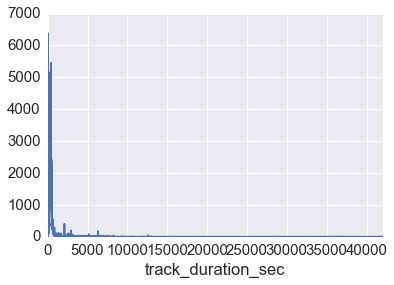

In [141]:
orig_df['track_duration_sec'] = df.apply( lambda x : x['track_duration'] / 1000, axis=1)
orig_df.groupby(['track_duration_sec']).size().plot()

In [142]:
bins = [0, 120, 500, 5000, 50000]
group_names = ['Short', 'Average', 'Long', 'Extremely Long']
orig_df['track_duration_category'] = pd.cut(orig_df['track_duration_sec'], bins, labels=group_names)
orig_df['track_duration_category'] = orig_df['track_duration_category'].astype('object')

In [143]:
df = orig_df.copy()

## Calculating the model

Define the features of the model

In [144]:
features_list = ['country_code', 'client_version', 'listening_context', 'recommender_algorithm_name', \
                 'track_genre_category', 'track_duration', 'listen_duration', \
                 'listener_top_genre_category_listened', 'listener_prev_month_listening_time',\
                 'listener_prev_month_avg_daily_tracks_listened', 'track_duration_category']

The XGBoost model works with integers, floats and boolean data.  
Therefore, all the categorical string data should be convert into integers.

In [145]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

Spliting the data into train and test. The train will be used to build the model and the test will be used to check the model's performance.

In [146]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

Training the model. The target is 'skip' column

In [147]:
xgdmat = xgb.DMatrix(train[features_list], train['skip']) # Create our DMatrix to make XGBoost more efficient

In [148]:

params = {
    'objective':'binary:logistic',
    'max_depth':5,
    'silent':1,
    'eta':0.1
}

num_rounds = 200

final_gb = xgb.train(params, xgdmat, num_rounds)

### Spotting Most Important Features

Plot 1 : feature which provided the most gain  
Plot 2 : **F-score** - sums up how many times a split was performed on each feature.

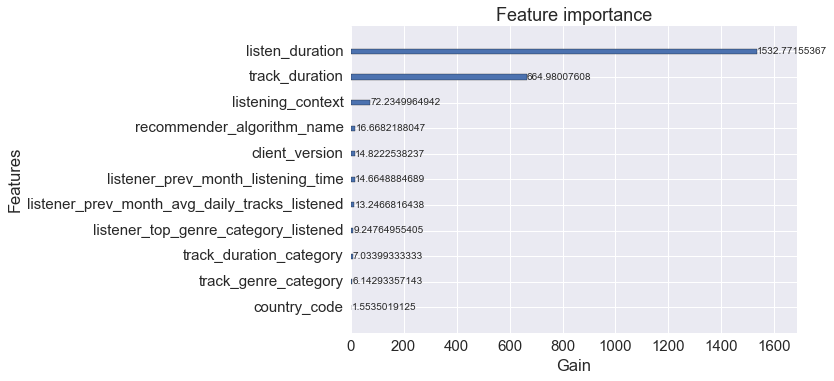

In [149]:
sns.set(font_scale = 1.5)
xgb.plot_importance(final_gb, importance_type='gain', xlabel='Gain')

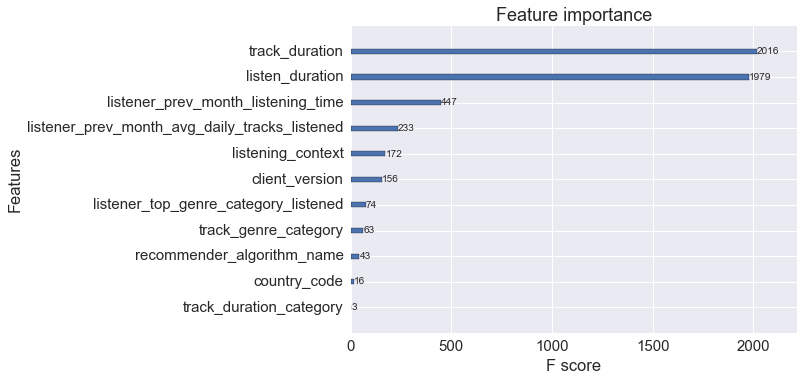

In [150]:

xgb.plot_importance(final_gb)

### Make predictions

In [151]:
testdmat = xgb.DMatrix(test[features_list], test['skip'])

from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat

print y_pred

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
print y_pred

random_y = y_pred.copy()
random_y[random_y <> -1] = 0

my_model = accuracy_score(y_pred, test['skip']), 1-accuracy_score(y_pred, test['skip'])
print('Predicted Accuracy of XGBoost model : {0:.3f}'.format(my_model[0]))

random_model = accuracy_score( random_y, test['skip']), 1-accuracy_score( random_y, test['skip'])
print('Predicted Accuracy of predicting all 0 : {0:.3f}'.format(random_model[0]))

[ 0.02907825  0.99999952  0.00763211 ...,  0.99999988  0.01488335
  0.75159997]
[ 0.  1.  0. ...,  1.  0.  1.]
Predicted Accuracy of XGBoost model : 0.987
Predicted Accuracy of predicting all 0 : 0.578


The prediction model based on XGBoost - **prdeicted skip with accuracy of 98%** which is better than a uniform guess of 0.

## Analyze Features

The factors that affect the most a listener’s choice to skip a recommended track from the model are presented in two graphs.     
I chose to focus on two features which I believe SoundCloud’s Recommendations team could use to decrease skip rate.


### Track Duration

I divided the track duration into two chuncks in order to better present the insights.  
In the graph : The blue line is users who didn't skip.  
The red line is users who skiped the song.  

From the graph we can see that in songs that are shorter than 700 sec (~11:40 minutes), users skip less than in songs that are longer. As the tracks become longer, the probability of a user to skip the track is much higher.
My first insight would be to recommend songs with duration shorter than 700 seconds.

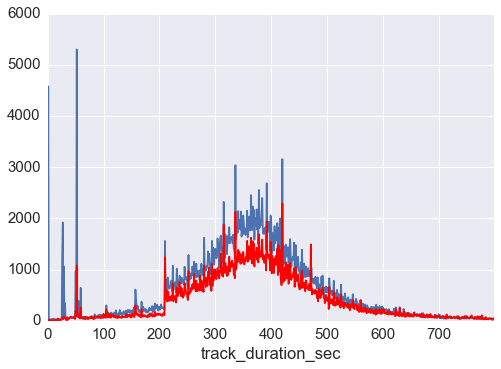

In [183]:
data1 = df[(df['track_duration_sec'] < 800)&(df['skip'] == False)]
data1 = data1.groupby('track_duration_sec').size()

data2 = df[(df['track_duration_sec'] < 800)&(df['skip'] == True)]
data2 = data2.groupby('track_duration_sec').size()

data1.plot()
data2.plot(color='red')


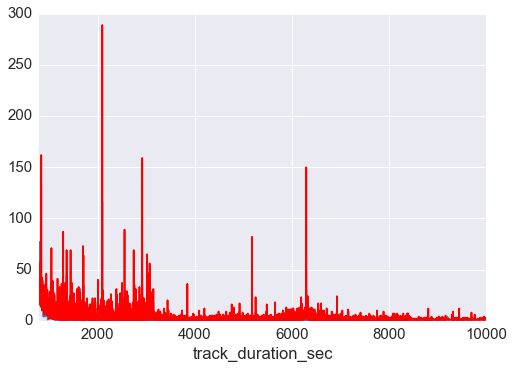

In [185]:
data1 = df[(df['track_duration_sec'] > 800)&(df['skip'] == False)&(df['track_duration_sec'] < 10000)]
data1 = data1.groupby('track_duration_sec').size()

data2 = df[(df['track_duration_sec'] > 800)&(df['skip'] == True)&(df['track_duration_sec'] < 10000)]
data2 = data2.groupby('track_duration_sec').size()

data1.plot()
data2.plot(color='red')

### Recommndation Algorithm

As we noticed, choice of recommendation algorithm was one of the factors as well. 
Content-base recommendation has a skip ratio of ~0.4 where fallback and hybrid skip ratio is higher than 0.5.
I would suggest to give less recommendation from these two models when it is possible (fallback might suggest that it is not always possible).
Also I would suggest to try and develop better fallback model that will result in less skips.

In [154]:
df['dummy'] = 1
rec_data = df.groupby('recommender_algorithm_name')

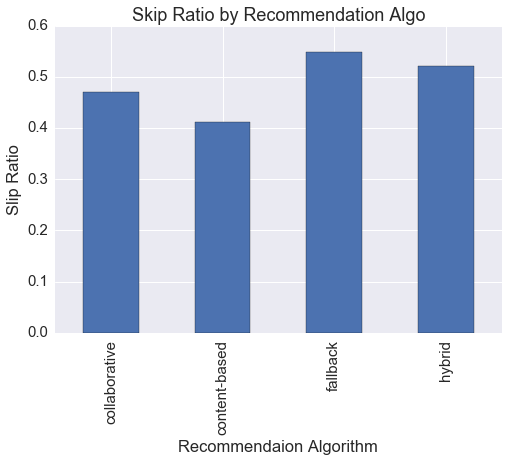

In [179]:
orig_df['recommender_algorithm_code'] = pd.Categorical(orig_df['recommender_algorithm_name']).codes
code_list = list(orig_df['recommender_algorithm_code'].unique())
name_list = list(orig_df['recommender_algorithm_name'].unique())
name_list = [x for (y,x) in sorted(zip(code_list,name_list))]

category_group = rec_data['skip', 'dummy'].sum()
category_group['skip_ratio'] = category_group['skip'] / category_group['dummy']
my_plot = category_group['skip_ratio'].plot(kind='bar',stacked=True,title="Skip Ratio by Recommendation Algo")
my_plot.set_xlabel("Recommendaion Algorithm")
my_plot.set_ylabel("Slip Ratio")
my_plot.set_xticklabels( name_list )